In [ ]:
# Supervised Machine Learning
# Regression - Polynomial Regression

# Import All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
# Select Dependent and Independent Variable
X = data.Level.values.reshape(-1,1)
Y = data.Salary.values

In [ ]:
# Model Development
lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
# Using Pickle
#import pickle
#pickle.dump(lin_reg,open('poly_reg.pkl','wb'))

In [ ]:
pred_values = lin_reg.predict(X)
print(pred_values)

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


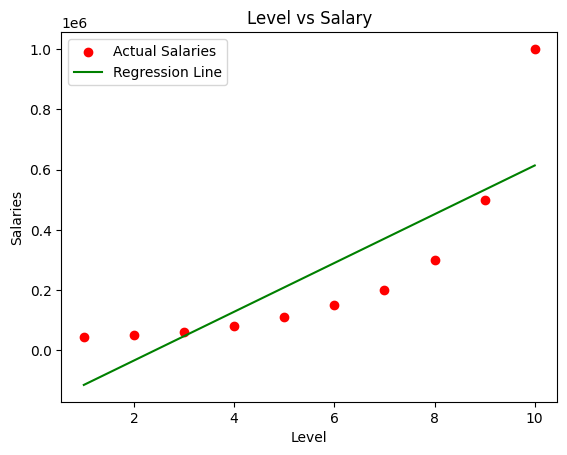

In [ ]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Salaries')
# plot regression line
plt.plot(X,pred_values,color='green',label='Regression Line')
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [ ]:
# We Will Try To Use Normalization
import sklearn.preprocessing as pp
y_scaled = pp.normalize([Y]).flatten()
# use flatten to convert 2D into 1D because Y is dependent.dependent can't have 2 variables
y_scaled

array([0.03764241, 0.0418249 , 0.05018988, 0.06691984, 0.09201478,
       0.1254747 , 0.16729959, 0.25094939, 0.41824899, 0.83649797])

In [ ]:
# Model Development After Normalization
lin_reg.fit(X,y_scaled)

LinearRegression()

In [ ]:
# Using Pickle
#import pickle
#pickle.dump(lin_reg,open('poly_reg.pkl','wb'))
#pickle.dump(poly_reg, open('poly_reg_transform.pkl','wb'))

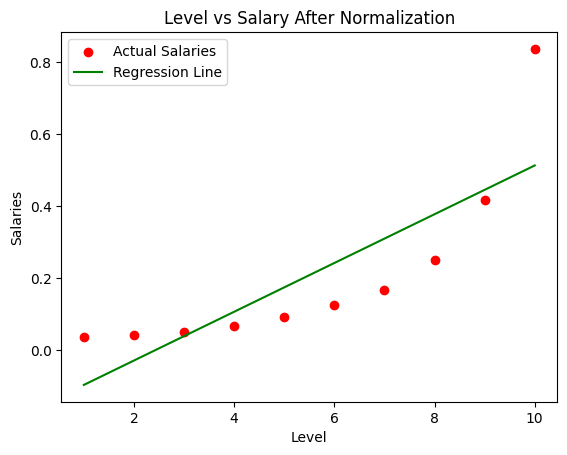

In [ ]:
# plot actual values
plt.scatter(X,y_scaled,color='red',label='Actual Salaries')
# plot regression line
plt.plot(X,lin_reg.predict(X),color='green',label='Regression Line')
plt.title('Level vs Salary After Normalization')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [ ]:
# Let's Use Polynomial Regression
# Generate Polynomial Features

# by default the degree of independent variable is 1
# but in Polynomial regression we will increase the degree of independent variable
# and then we will Train Our Model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

x_poly_2 = poly_reg.fit_transform(X)  # fit_transform(X) will increase the degree
x_poly_2

# when degree = 2 , then new features will be created like this  1  x*1  x*x
# when degree = 3 , then new features will be created like this  1  x*1  x*x  x*x*x
# when degree = 4 , then new features will be created like this  1  x*1  x*x  x*x*x  x*x*x*x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
# Model Development Using Degree = 2
lin_reg.fit(x_poly_2,Y)

LinearRegression()

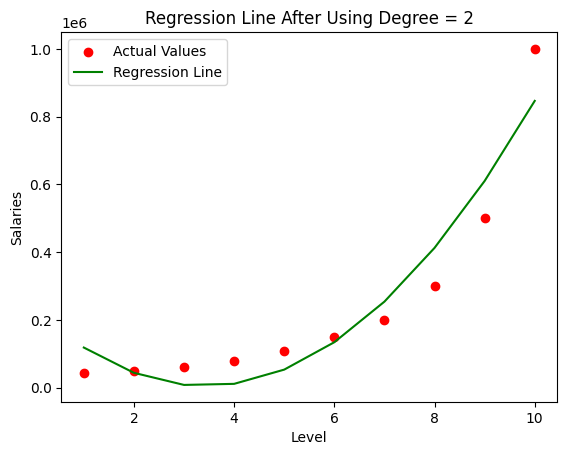

In [ ]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot regression line
plt.plot(X,lin_reg.predict(x_poly_2),color='green',label='Regression Line')
plt.title('Regression Line After Using Degree = 2')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [ ]:
# Degree = 3
poly_reg = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg.fit_transform(X)
# Model Development using Degree = 3
lin_reg.fit(x_poly_3,Y)

LinearRegression()

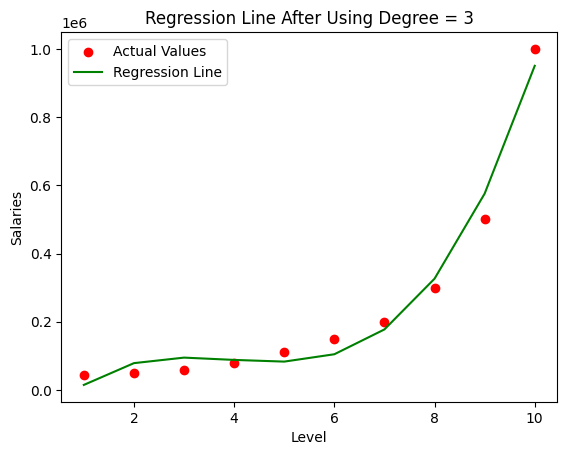

In [ ]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot regression line
plt.plot(X,lin_reg.predict(x_poly_3),color='green',label='Regression Line')
plt.title('Regression Line After Using Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [ ]:
# Degree = 4
poly_reg = PolynomialFeatures(degree=4)
x_poly_4 = poly_reg.fit_transform(X)
# Model Development using Degree = 4
lin_reg.fit(x_poly_4,Y)

LinearRegression()

In [ ]:
# USE PICKLE HERE
import pickle
pickle.dump(lin_reg,open('poly_reg.pkl','wb'))
pickle.dump(poly_reg, open('poly_reg_transform.pkl','wb'))

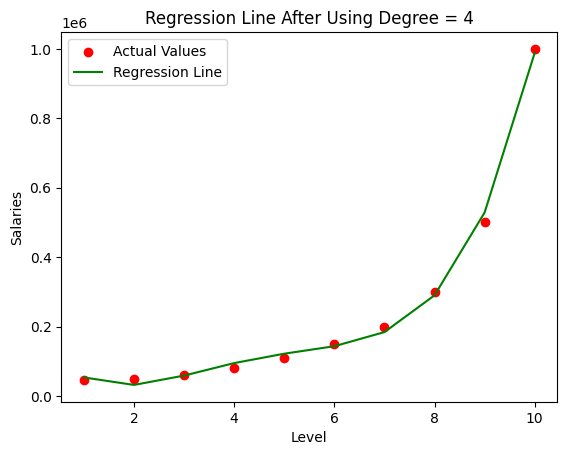

In [ ]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot regression line
plt.plot(X,lin_reg.predict(x_poly_4),color='green',label='Regression Line')
plt.title('Regression Line After Using Degree = 4')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.legend()
plt.show()

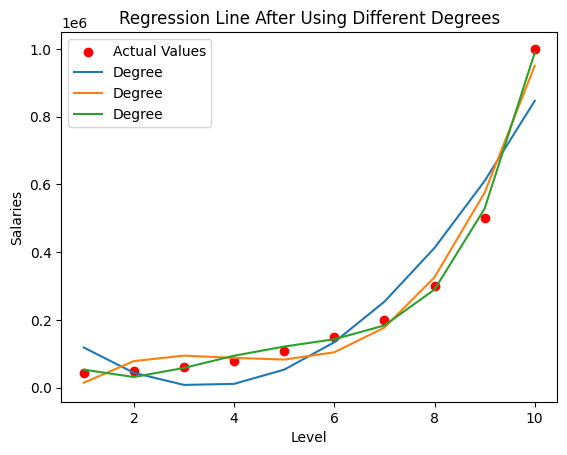

In [ ]:
#USE THIS CODE. MORE BETTER
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
for i in range(2,5):
  poly_reg = PolynomialFeatures(degree=i)
  x_poly = poly_reg.fit_transform(X)
  lin_reg.fit(x_poly,Y)
  plt.plot(X,lin_reg.predict(x_poly),label='Degree')

plt.title('Regression Line After Using Different Degrees')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y,lin_reg.predict(x_poly))

0.9973922891706614

In [ ]:
# Final Predictions
level = int(input('Enter Your Working Level : '))
level = poly_reg.fit_transform([[level]])  # [[]] 2D
predict_salary = lin_reg.predict(level)
print(f"Predicted Salary {int(predict_salary[0])}")

Enter Your Working Level : 3
Predicted Salary 58642


Degree 1 - R2 Score: 0.6690412331929895
Degree 2 - R2 Score: 0.9162082221443942
Degree 3 - R2 Score: 0.9812097727913366
Degree 4 - R2 Score: 0.9973922891706614
Degree 5 - R2 Score: 0.9997969027099755


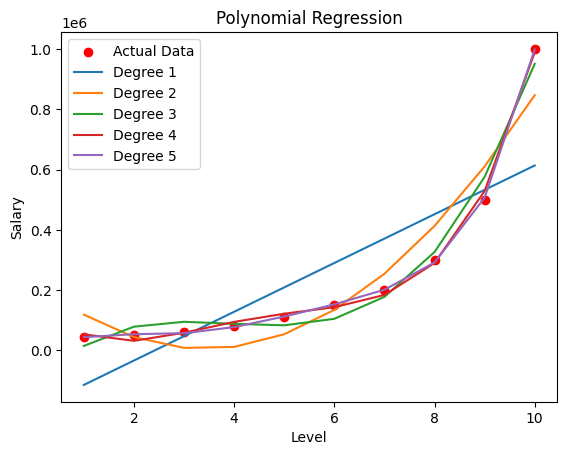

In [ ]:
# Final Code For Polynomial Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

# Try polynomial degrees 1 to 5 (no X_grid)
plt.scatter(X, y, color='red', label='Actual Data')

for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Predict using the same X (no grid)
    y_pred = lin_reg.predict(X_poly)

    # Calculate r2 score
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} - R2 Score: {r2}")

    # Plot the curve
    plt.plot(X, y_pred, label=f'Degree {degree}')

plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

# just use until degree 4 only because degree 5 is overfitting

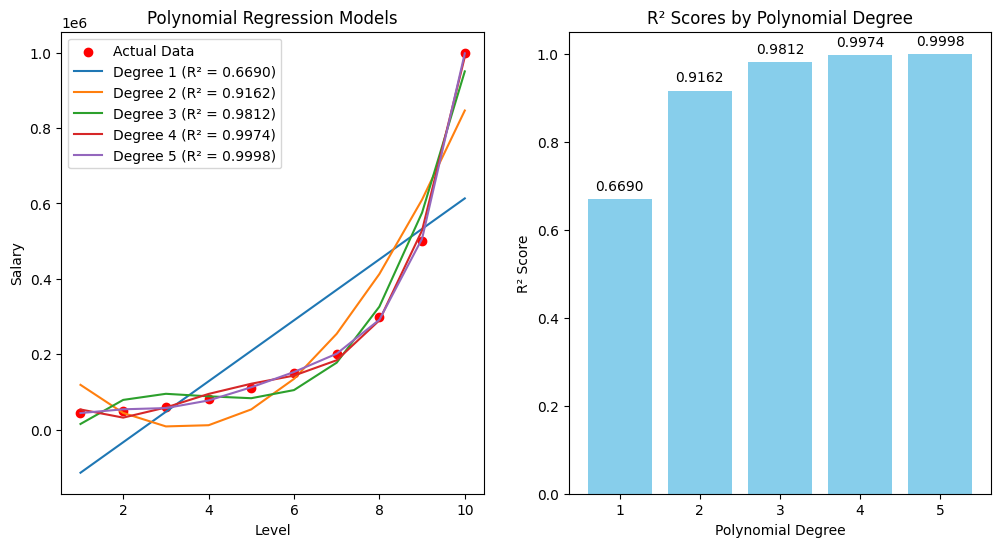

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

# Create figure for plotting
plt.figure(figsize=(12, 6))

# Plot the actual data points
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Actual Data')

# Dictionary to store R² scores
r2_scores = {}

# Try polynomial degrees 1 to 5
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    # Predict using the same X
    y_pred = lin_reg.predict(X_poly)
    # Calculate R² score
    r2 = r2_score(y, y_pred)
    r2_scores[degree] = r2
    # Plot the curve
    plt.plot(X, y_pred, label=f'Degree {degree} (R² = {r2:.4f})')

plt.title("Polynomial Regression Models")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()

# Plot the R² scores
plt.subplot(1, 2, 2)
degrees = list(r2_scores.keys())
scores = list(r2_scores.values())
plt.bar(degrees, scores, color='skyblue')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Scores by Polynomial Degree')
for i, v in enumerate(scores):
    plt.text(i+1, v+0.02, f'{v:.4f}', ha='center')

plt.show()